# POSTTEST 8 Deep Learning
# Nama  : ANDI NUR FADILAH
# NIM   : 2109106015
# Kelas : INFORMATIKA A 21

## Mengimport Library yang Digunakan

In [87]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

## Memuat Data & Data Split

In [88]:
(x_train_raw, y_train_raw),(x_test_raw, y_test_raw) = tfds.load("beans", batch_size = -1, split=['train+test', 'train[:70%]+test'], as_supervised = True)

## Pratinjau Gambar

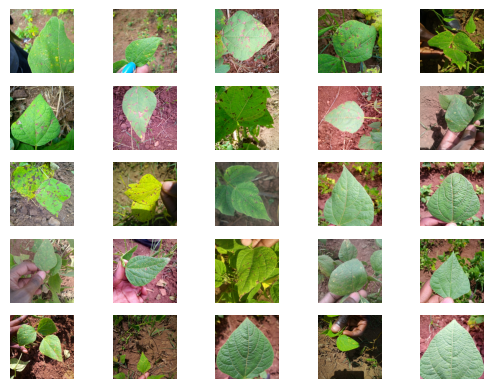

In [89]:
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train_raw[i])
    plt.axis('off')
plt.show()

In [90]:
x_train_raw.shape

TensorShape([1162, 500, 500, 3])

In [91]:
x_test_raw.shape

TensorShape([852, 500, 500, 3])

## Encoding Label pada Gambar

In [101]:
# ONE HOT ENCODING
y_train = tf.keras.utils.to_categorical(y_train_raw, 3)
y_test = tf.keras.utils.to_categorical(y_test_raw, 3)

## Resize Gambar pada Dataset

In [102]:
data_train = tf.image.resize(x_train_raw, (28, 28))
data_test  = tf.image.resize(x_test_raw, (28, 28))

## Reshape Gambar pada Dataset

In [103]:
data_train = np.reshape(data_train.numpy(), (1162, 2352))
data_test  = np.reshape(data_test.numpy(), (852, 2352))

## Normalisasi piksel pada gambar

In [104]:
data_train = data_train.astype('float32')/255
data_test  = data_test.astype('float32')/255

## Membuat DNN (Deep Neural Network)

### Terdiri dari 3 layers dan 2 aktivasi RELU

In [110]:
model = Sequential(
    [
        Dense(512, activation = 'relu', input_dim = 2352),
        Dense(256, activation = 'relu'),
        Dense(3, activation = 'softmax'),
        
    ]
)

In [111]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 512)               1204736   
                                                                 
 dense_26 (Dense)            (None, 256)               131328    
                                                                 
 dense_27 (Dense)            (None, 3)                 771       
                                                                 
Total params: 1,336,835
Trainable params: 1,336,835
Non-trainable params: 0
_________________________________________________________________


### Optimasi Model

In [112]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Fitting Training Model

In [115]:
fit = model.fit(data_train, y_train, batch_size = 218, epochs = 30, validation_data = (data_test, y_test))
# batch_size : ukuran yang diambil di setiap epochsnya, biasanya defaultnya 32, intinya kelipatan 8

Epoch 1/30
6/6 [==============================] - 0s 27ms/step - loss: 0.7028 - accuracy: 0.6867 - val_loss: 0.6783 - val_accuracy: 0.7183
Epoch 2/30
6/6 [==============================] - 0s 20ms/step - loss: 0.6856 - accuracy: 0.7022 - val_loss: 0.6968 - val_accuracy: 0.6808
Epoch 3/30
6/6 [==============================] - 0s 17ms/step - loss: 0.6622 - accuracy: 0.7194 - val_loss: 0.6352 - val_accuracy: 0.7465
Epoch 4/30
6/6 [==============================] - 0s 20ms/step - loss: 0.6328 - accuracy: 0.7410 - val_loss: 0.6192 - val_accuracy: 0.7547
Epoch 5/30
6/6 [==============================] - 0s 21ms/step - loss: 0.6235 - accuracy: 0.7496 - val_loss: 0.5997 - val_accuracy: 0.7523
Epoch 6/30
6/6 [==============================] - 0s 22ms/step - loss: 0.6110 - accuracy: 0.7522 - val_loss: 0.6796 - val_accuracy: 0.6796
Epoch 7/30
6/6 [==============================] - 0s 21ms/step - loss: 0.6390 - accuracy: 0.7315 - val_loss: 0.6336 - val_accuracy: 0.7347
Epoch 8/30
6/6 [===========

### Evaluasi Model yang telah dilatih (train)

In [116]:
score = model.evaluate(data_test, y_test)
print("TEST LOSS            : ", score[0])
print("TEST ACCURACY        : ", score[1])
print("VALIDATION LOSS      : ", fit.history['val_loss'][-1])
print("VALIDATION ACCURACY  : ", fit.history['val_accuracy'][-1])

27/27 [==============================] - 0s 3ms/step - loss: 0.3252 - accuracy: 0.9061
TEST LOSS            :  0.32521912455558777
TEST ACCURACY        :  0.9061033129692078
VALIDATION LOSS      :  0.32521915435791016
VALIDATION ACCURACY  :  0.9061033129692078
